# Week 4 Problem Set

## Cohort Sessions

**CS1.** We are going to create a simple Car Racing game. First, let's create a class Car with the following properties:
- `racer` which stores the name of the driver. This property must be non-empty string. This property should be initialized upon object instantiation.
- `speed` which stores the speed of the car. This property can only be non-negative values and must be less than a maximum speed.
- `pos` which is an integer specifying the position of the car which can only be non-negative values.
- `is_finished` which is a computed property that returns `True` or `False` depending whether the position has reached the finish line.

Each car also has the following attributes:
- `max_speed` which specifies the maximum speed the car can have. This attribute should be initialized upon object instantiation.
- `finish` which stores the finish distance the car has to go through. Upon initialization, it should be set to -1. 

The class has the following methods:
- `start(init_speed, finish_distance)` which set the speed property to some initial value. The method also set the finish distance to some value and set the `pos` property to 0.
- `race(acceleration)` which takes in an integer value for its acceleratin and modify both the speed and the position of the car.



In [23]:
class RacingCar:
    
    def __init__(self, name, max_speed):
        self.name = name
        self.max_speed = max_speed
        self.finish = -1
    
    #getter
    @property
    def racer(self):
        return self.name
    
    @racer.setter
    def racer(self, name):
        if isinstance(name, str) and name != "":
            self.name = name
            
    #getter
    @property
    def speed(self):
        return self._speed
    
    @speed.setter
    def speed(self, val):
        if val <= self.max_speed and val >= 0:
            self._speed = val
    
    #getter
    @property
    def pos(self):
        return self._pos
    
    @pos.setter
    def pos(self, val):
        if isinstance(val, int) and val >= 0:
            self._pos = val
     
    #getter
    @property
    def is_finished(self):
        if self.finish > 0:
            return self._pos >= self.finish
        else:
            return False
    
    #method
    def start(self, init_speed, finish_dist):
        self._speed = init_speed
        self.finish = finish_dist
        self._pos = 0
    
    #method
    def race(self, acc):
        if isinstance(acc, int):
            self._speed += acc
            self._pos = self._pos + self._speed
    
    #???    
    def __str__(self):
        return f"Racing Car {self.racer} at position: {self.pos}, with speed: {self.speed}."
    
            
    

In [24]:
car = RacingCar("Hamilton", 200)
assert car.racer == "Hamilton"
assert car.max_speed == 200
assert car.finish == -1

car.racer = "Bottas"
assert car.racer == "Bottas"
car.racer = ""
assert car.racer == "Bottas"
car.racer = 21
assert car.racer == "Bottas"

car.speed = 10
assert car.speed == 10
car.speed = 0
assert car.speed == 0
car.speed = -10
assert car.speed == 0
car.speed = car.max_speed
assert car.speed == car.max_speed
car.speed = car.max_speed + 10
assert car.speed == car.max_speed

car.pos = 10
assert car.pos == 10
car.pos = -10
assert car.pos == 10
car.pos = 0
assert car.pos == 0

assert not car.is_finished
car.finish = 20
car.pos = 10
assert not car.is_finished
car.pos = 20
assert car.is_finished
car.pos = 22
assert car.is_finished

car.start(50, 200)
assert car.pos == 0
assert car.speed == 50
assert car.finish == 200

car.race(0)
assert car.speed == 50
assert car.pos == 50
assert not car.is_finished

car.race(10)
assert car.speed == 60
assert car.pos == 110
assert not car.is_finished

car.race(-10)
assert car.speed == 50
assert car.pos == 160
assert not car.is_finished

car.race(0)
assert car.is_finished

**CS2.** Implement a `RacingGame` class that plays car racing using Python `random` module to simulate car's acceleration. The class has the following attribute(s):
- `car_list` which is a dictionary containing all the `RacingCar` objects where the keys are the racer's name.

The class has the following properties:
- `winners` which list the winners from the first to the last. If there is no winner, it should return `None`.

Upon instantiation, it should initalize the game with some **random seed**. This is to ensure that the behaviour can be predicted.

It has the following methods:
- `add_car(name, max_speed)` which creates a new `RacingCar` object and add it into the `car_list`. 
- `start(finish_distance)` which uses the `random` module to assign different initial speeds (0 to 50) to each of the racing car and set the same finish distance for all cars.
- `play(finish)` which contains the main loop of the game that calls the `RacingCar`'s method `race()` until all cars reach the finish line. It takes in an argument for the finish distance.



In [25]:
import random

class RacingGame:
    
    def __init__(self, seed):
        self.car_list = {}
        self._winners = []
        random.seed(seed)
        
    @property
    def winners(self):
        if len(self._winners) == 0:
            return None
        else:
            return self._winners
        
    def add_car(self, name, speed):
        car = RacingCar(name, speed)
        self.car_list[car.racer] = car
        
        
    def start(self, finish):
        for car in self.car_list.values():
            init_speed = random.randint(0, 50)
            car.start(init_speed, finish)
    
    def play(self, finish):
        self.start(finish)
        finished_car = 0
        while True:
            for racer, car in self.car_list.items():
                if not car.is_finished:
                    acc = random.randint(-10, 20)
                    car.race(acc)
                    # you can comment out the line below to check the output
                    # print(car)
                    if car.is_finished:
                        self._winners.append(racer)
                        finished_car +=1
            if finished_car == len(self.car_list):
                break
            

In [26]:
game = RacingGame(100)
assert game.car_list == {}
assert game.winners == None

game.add_car("Hamilton", 250)
assert len(game.car_list) == 1
assert game.car_list["Hamilton"].racer == "Hamilton"

game.add_car("Vettel", 200)
assert len(game.car_list) == 2
assert game.car_list["Vettel"].racer == "Vettel"

game.start(200)
assert [ car.pos for car in game.car_list.values()] == [0, 0]
assert [ car.speed for car in game.car_list.values()] == [9, 29]
assert [ car.finish for car in game.car_list.values()] == [200, 200]

game.play(200)
assert game.winners == ["Vettel", "Hamilton"]

game = RacingGame(200)
game.add_car("Hamilton", 250)
game.add_car("Vettel", 200)
game.play(200)
assert game.winners == ["Hamilton", "Vettel"]

In [27]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS3.** Implement the `Stack` abstract data type using a Class. You can use `list` Python data type as its internal data structure. Name this `list` as `items`.

The class should have the following interface:
- `__init__()` to initialize an empty list for the stack to store the items.
- `push(item)` which stores an Integer into the top of the stack.
- `pop()` which returns and removes the top element of the stack. The return value is optional as it may return `None` if there are no more elements in the stack.
- `peek()` which returns the top element of the stack. If the stack is empty, it returns `None`.

The class should have the following properties:
- `is_empty` is a computed property which returns either `true` or `false` depending whether the stack is empty or not.
- `size` is a computed property which returns the number of items in the stack.


In [28]:
class Stack:
    def __init__(self):
        self.__items = []
        
    def push(self, item):
        self.__items.append(item)

    def pop(self):
        if not self.is_empty:
            return self.__items.pop()

    def peek(self):
        if not self.is_empty:
            return self.__items[-1]

    @property
    def is_empty(self):
        return self.__items == []

    @property
    def size(self):
        return len(self.__items)



In [29]:
s1 = Stack()
s1.push(2)
assert not s1.is_empty
assert s1.pop() == 2
assert s1.is_empty
assert s1.pop() == None
s1.push(1)
s1.push(2)
s1.push(3)
assert not s1.is_empty
assert s1._Stack__items == [1, 2, 3]
assert s1.peek() == 3
assert s1.size == 3

In [30]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS4.** Write a class called `EvaluatePostfix` that evaluates postfix notation implemented using Stack data structure. Postfix notation is a way of writing expressions without parenthesis. For example, the expression `(1+2)*3` would be written as `1 2 + 3 *`. The class `EvaluatePostfix` has the following methods:
- `input(inp)`: which pushes the input one at a time. For example, to create a postfix notation `1 2 + 3 *`, we can call this method repetitively, e.g. `e.input('1'); e.input('2'); e.input('+'); e.input('3'); e.input('*')`. Notice that the input is of String data type. 
- `evaluate()`: which returns the output of the expression.

Postfix notation is evaluated using a Stack. The input streams from `input()` are stored in a Queue, which we will implement using Python's List. Note: If you have finished your homework on Queue, you can replace this part with your Queue. 

If the output of the Queue is a number, the item is pushed onto the stack. If it is an operator, we will apply the operator to the top two items in the stacks, pushing the result back onto the stack. 

In [31]:
class EvaluatePostfix:

    operands = "0123456789"
    operators = "+-*/"

    def __init__(self):
        self.expression = []
        self.stack = Stack()

    def input(self, item):
        self.expression.insert(0, item)
        
    def operator(self, left, right, op):
        if op == "+":
            return left + right
        elif op == "-":
            return left - right
        elif op == "*":
            return left * right
        elif op == "/":
            return left / right

    def evaluate(self):
        while self.expression != []:
            item = self.expression.pop()
            if item in self.operators and len(item) == 1:
                right = self.stack.pop()
                left = self.stack.pop()
                result = self.operator(left, right, item)
                self.stack.push(result)
            else:
                self.stack.push(int(item))
        return self.stack.pop()
            

In [32]:
pe = EvaluatePostfix()
pe.input("2")
pe.input("3")
pe.input("+")
assert pe.evaluate()== 5

pe.input("2")
pe.input("3")
pe.input("+")
pe.input("6")
pe.input("-")
assert pe.evaluate()== -1

In [33]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS5.** Implement a Queue abstract data structure using two Stacks instead of Python's list. For this double-stack implementation, the Queue has a *left* Stack and a *right* Stack. The enqueue and dequeue operations work as follows:
- enqueue: This operation just pushes the new item into the *right* Stack.
- dequeue: This operation is done as follows:
    - if the *left* Stack is empty: create a new *left* Stack which is the reverse of the items in the *right* Stack. You should then empty the *right* stack.
    - if the *left* Stack is not empty: pop from the *left* Stack.

In [34]:
#Copy the Cohort implementation

class Stack:
    def __init__(self):
        self.__items = []
        
    def push(self, item):
        self.__items.append(item)

    def pop(self):
        if not self.is_empty:
            return self.__items.pop()

    def peek(self):
        if not self.is_empty:
            return self.__items[-1]

    @property
    def is_empty(self):
        return self.__items == []

    @property
    def size(self):
        return len(self.__items)

In [35]:
class Queue:
    def __init__(self):
        self.left_stack = Stack()
        self.right_stack = Stack()
    
    def enqueue(self, item):
        self.right_stack.push(item)
    
    def right_to_left (self):
        while not self.right_stack.is_empty:
            item = self.right_stack.pop()
            self.left_stack.push(item)
    
    def dequeue(self):
        if self.left_stack.is_empty:
            self.right_to_left()
        return self.left_stack.pop()
    
    def peek(self):
        if self.left_stack.is_empty:
            self.right_to_left()
        return self.left_stack.peek()
    
    @property
    def is_empty(self):
        return self.left_stack.is_empty and self.right_stack.is_empty
    
    @property
    def size(self):
        return self.left_stack.size + self.right_stack.size


In [36]:
q1 = Queue()
q1.enqueue(2)
assert not q1.is_empty 
assert q1.size == 1
assert q1.dequeue() == 2
assert q1.is_empty
q1.enqueue(1)
q1.enqueue(2)
q1.enqueue(3)
assert q1.size == 3
assert q1.peek() == 1
assert q1.dequeue() == 1
assert q1.dequeue() == 2
assert q1.dequeue() == 3
assert q1.peek() == None

In [37]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**CS6.** **You need to complete CS5 before attempting this question.** Compute the computational time to do enqueue operation for a list based Queue implementation versus a double-stack based Queue implementation. Which one is faster? Why? There are a few parts you need to fill up.
- `enqueue(q, array)`, which is a function to enqueue every element in the array to the Queue `q`.
- `dequeue(q, array)`, which is a function to dequeue every element in the array from the Queue `q`. *Hint: you don't need the argument `array` but it is put here so that we can make use of the `run_function(f, x, y)`*.

You also need to replace some of the `None` in the code to compute the computational time inside the for-loop.

First you need to paste the Queue implementation using list-based.

In [38]:
class Queue:
    def __init__(self):
        self.__items = []
    
    def enqueue(self, item):
        self.__items.append(item)
    
    def dequeue(self):
        if self.__items == []:
            return None
        else:
            return self.__items.pop(0)
    
    def peek(self):
        return self.__items[0]
    
    @property
    def is_empty(self):
        return self.__items == []
    
    @property
    def size(self):
        return len(self.__items)

In [39]:
import time
import random

def run_function(f, x, y):
    start = time.time()
    f(x, y)
    end = time.time()
    return end-start

def enqueue(q, array):
    for i in array:
        q.enqueue(i)

def dequeue(q, array):
    while not q.is_empty:
        q.dequeue()

time_enqueue_list = []
time_dequeue_list = []

# set the maximum power for 10^power number of inputs
maxpower = 5
for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, 10^3, etc 
    # use seed = 100
    array = list(range(0, 10**n))
    
    # create queue
    queue = Queue()
    
    # call run_function for enqueue
    result_enqueue = run_function(enqueue, queue, array)
    
    # call run_function for dequeue
    result_dequeue = run_function(dequeue, queue, array)
    
    ###
    ### YOUR CODE HERE
    ###
    
    time_enqueue_list.append(result_enqueue)
    time_dequeue_list.append(result_dequeue)

print(time_enqueue_list)
print(time_dequeue_list)

[6.198883056640625e-06, 1.52587890625e-05, 0.00013589859008789062, 0.0012710094451904297, 0.014780998229980469]
[8.106231689453125e-06, 2.8133392333984375e-05, 0.00030493736267089844, 0.13085293769836426, 13.581891059875488]


Paste the code for the Queue using double Stack implementation.

In [40]:
class Queue:
    def __init__(self):
        self.left_stack = Stack()
        self.right_stack = Stack()
    
    def enqueue(self, item):
        self.right_stack.push(item)
    
    def right_to_left (self):
        while not self.right_stack.is_empty:
            item = self.right_stack.pop()
            self.left_stack.push(item)
    
    def dequeue(self):
        if self.left_stack.is_empty:
            self.right_to_left()
        return self.left_stack.pop()
    
    def peek(self):
        if self.left_stack.is_empty:
            self.right_to_left()
        return self.left_stack.peek()
    
    @property
    def is_empty(self):
        return self.left_stack.is_empty and self.right_stack.is_empty
    
    @property
    def size(self):
        return self.left_stack.size + self.right_stack.size



In [41]:
import time
import random

def run_function(f, x, y):
    start = time.time()
    f(x, y)
    end = time.time()
    return end-start


def enqueue(q, array):
    for i in array:
        q.enqueue(i)

def dequeue(q, array):
    while not q.is_empty:
        q.dequeue()

time_enqueue_stack = []
time_dequeue_stack = []

# set the maximum power for 10^power number of inputs
maxpower = 5
for n in range(1, maxpower + 1):
    # create array for 10^1, 10^2, 10^3, etc 
    # use seed = 100
    array = list(range(0, 10**n))
    
    # create queue
    queue = Queue()
    
    # call run_function for enqueue
    result_enqueue = run_function(enqueue, queue, array)
    
    # call run_function for dequeue
    result_dequeue = run_function(dequeue, queue, array)
    
    ###
    ### YOUR CODE HERE
    ###
    
    time_enqueue_stack.append(result_enqueue)
    time_dequeue_stack.append(result_dequeue)


print(time_enqueue_stack)
print(time_dequeue_stack)

[1.6927719116210938e-05, 2.4080276489257812e-05, 0.0006780624389648438, 0.002811908721923828, 0.024688720703125]
[1.9311904907226562e-05, 0.00011801719665527344, 0.0012040138244628906, 0.012275934219360352, 0.12127995491027832]


In [42]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Enqueue Time')

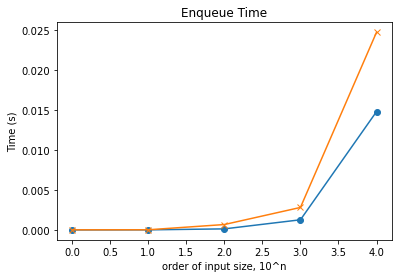

In [43]:
plt.plot(time_enqueue_list,'o-')
plt.plot(time_enqueue_stack,'x-')
plt.ylabel("Time (s)")
plt.xlabel("order of input size, 10^n")
plt.title("Enqueue Time")

Text(0.5, 1.0, 'Enqueue Time')

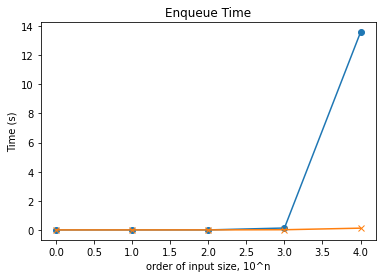

In [45]:
plt.plot(time_dequeue_list,'o-')
plt.plot(time_dequeue_stack,'x-')
plt.ylabel("Time (s)")
plt.xlabel("order of input size, 10^n")
plt.title("Enqueue Time")

In [ ]:
class Queue:
    def __init__(self):
        self.__items = []
    
    def enqueue(self, item):
        self.__items.append(item)
    
    def dequeue(self):
        if self.__items == []:
            return None
        else:
            return self.__items.pop(0)
    
    def peek(self):
        return self.__items[0]
    
    @property
    def is_empty(self):
        return self.__items == []
    
    @property
    def size(self):
        return len(self.__items)